In [343]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import csv
from sklearn.decomposition import PCA
from sklearn import linear_model
import statsmodels.api as sm
%pylab inline
# --------------------
# Read in Raw Data
# --------------------
redata = open('manhattan-dof.csv', "r")
csvReader = csv.reader(redata,delimiter=',')
next(csvReader)

X = np.array([r for r in csvReader])
X = X.astype(np.float)

# --------------------
# Filter data: make index for neighborhood 4, GrossSqFt <= 35000 and MarketValueperSqFt > 100 for 137 variables
# --------------------
index = np.where((X[:,0] == 4) & (X[:,3] <= 35000) & (X[:,5] > 100 ))


Populating the interactive namespace from numpy and matplotlib


In [397]:
# --------------------
# select independent variables and dependent variable (MarketValueperSqFt) and standardize by dividing by maximum
# --------------------
concat = [0,1,2,3,4]
t = []
for i in concat:
   t.append(X[index,i])
X_one_neighborhood=np.array(t)
X_one_neighborhood=X_one_neighborhood.reshape((-1,len(concat)))
Xtmax_one_neighborhood = np.amax(X_one_neighborhood,axis=0)
for i in range(0,len(concat)):
    X_one_neighborhood[:,i]=X_one_neighborhood[:,i]/Xtmax_one_neighborhood[i]
print X_one_neighborhood.shape


(137, 5)


In [399]:
Y_one_neighborhood=np.array(X[index,5]).reshape(-1,1)
Ytmax_one_neighborhood = np.amax(Y_one_neighborhood)
Y_one_neighborhood = Y_one_neighborhood/Ytmax_one_neighborhood
print Y_one_neighborhood.shape

(137, 1)


In [346]:
liregr = linear_model.LinearRegression()
liregr.fit(Xt, Yt)
print [liregr.coef_]
print liregr.intercept_
print "R-squared: ",1-((np.asarray(liregr.predict(Xt))-Yt)**2).sum()/((Yt-np.mean(Yt))**2).sum()

[array([[ 0.09222025, -0.10119044, -0.08611009, -0.00834582,  0.04008967]])]
[ 0.75455177]
R-squared:  0.0514134806316


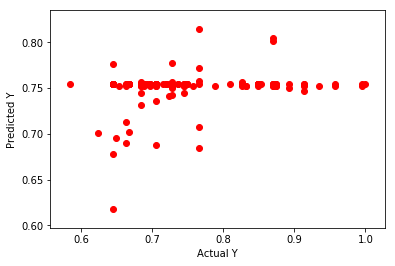

In [347]:
plt.scatter(Yt,liregr.predict(Xt),color='red')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

In [348]:
# Also do with sm.OLS just to check!
Xt = sm.add_constant(Xt)
res=sm.OLS(Yt,Xt).fit()
print res.summary() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.420
Date:                Mon, 20 Feb 2017   Prob (F-statistic):              0.221
Time:                        13:59:48   Log-Likelihood:                 135.95
No. Observations:                 137   AIC:                            -259.9
Df Residuals:                     131   BIC:                            -242.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.7546      0.009     83.319      0.0

In [349]:
# --------------------
# Do the same for all neighborhoods
# --------------------

concat = [0,1,2,3,4]
t = []
for i in concat:
   t.append(X[:,i])
Xt=np.array(t)
print Xt.shape
Xt=Xt.reshape((-1,len(concat)))
Xtmax = np.amax(Xt,axis=0)
for i in range(0,len(concat)):
    Xt[:,i]=Xt[:,i]/Xtmax[i]
print Xt.shape
Yt=np.array(X[:,5]).reshape(-1,1)
Ytmax = np.amax(Yt)
Yt = Yt/Ytmax
print Yt.shape

(5, 2645)
(2645, 5)
(2645, 1)


In [350]:
liregr = linear_model.LinearRegression()
liregr.fit(Xt, Yt)
print [liregr.coef_]
print liregr.intercept_

[array([[-0.12254491,  0.02690248,  0.02695934,  0.13819696,  0.01101943]])]
[ 0.40926343]


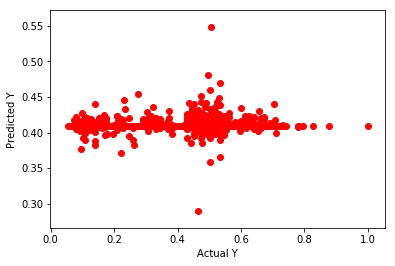

In [351]:
ols_prediction = liregr.predict(Xt)
plt.scatter(Yt,liregr.predict(Xt),color='red')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

In [352]:
Xt = sm.add_constant(Xt)
res=sm.OLS(Yt,Xt).fit()
print res.summary() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7560
Date:                Mon, 20 Feb 2017   Prob (F-statistic):              0.582
Time:                        13:59:51   Log-Likelihood:                 1021.2
No. Observations:                2645   AIC:                            -2030.
Df Residuals:                    2639   BIC:                            -1995.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.4093      0.003    118.773      0.0

(2645, 5)
(2645, 1)
[ 0.41961844  0.24151837  0.15065059  0.12501855  0.06319404]


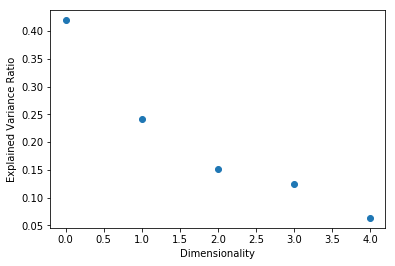

In [354]:
# --------------------
# PCA on raw data, normalized
# --------------------

redata = open('manhattan-dof.csv', "r")
csvReader = csv.reader(redata,delimiter=';')
next(csvReader)

redata = open('manhattan-dof.csv', "r")
csvReader = csv.reader(redata,delimiter=',')
next(csvReader)

X = np.array([r for r in csvReader])
X = X.astype(np.float)

concat = [0,1,2,3,4]
t = []
for i in concat:
   t.append(X[:,i])
Xt=np.array(t)
Xt=Xt.reshape((-1,len(concat)))
Xtmax = np.amax(Xt,axis=0)
for i in range(0,len(concat)):
    Xt[:,i]=Xt[:,i]/Xtmax[i]
print Xt.shape

Yt=np.array(X[:,5]).reshape(-1,1)
Ytmax = np.amax(Yt)
Yt = Yt/Ytmax
print Yt.shape

n=5 # how many eigenvectors we choose
pca = PCA(n)
Xproj = pca.fit_transform(Xt)
eigenvalues = pca.explained_variance_ratio_
print pca.explained_variance_ratio_
plt.plot(np.arange(n), eigenvalues,'o');
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.show()

[  2.80371819e+10   2.73353917e+03   3.68838373e+02   8.11850610e+01
   6.95787814e+00   2.37238479e-01]
[  9.99999886e-01   9.74969194e-08   1.31553282e-08   2.89562097e-09
   2.48166074e-10   8.46156552e-12]


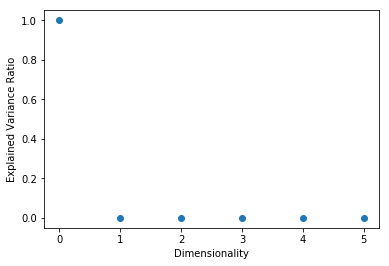

In [355]:
# --------------------
# PCA on raw data, NOT normalized
# --------------------

redata = open('manhattan-dof.csv', "r")
csvReader = csv.reader(redata,delimiter=',')
next(csvReader)

X = np.array([r for r in csvReader])
X = X.astype(np.float)

tpca=PCA()
tpca.fit(X)
print(tpca.explained_variance_)
print(tpca.explained_variance_ratio_)

plt.figure(1)
plt.plot(np.arange(len(tpca.explained_variance_ratio_)),tpca.explained_variance_ratio_, 'o')
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [356]:
# --------------------
# Linear Regression after projecting normalized X data onto 5 principal components
# --------------------

print Xproj.shape
print Yt.shape
Xproj = sm.add_constant(Xproj)
res=sm.OLS(Yt,Xproj).fit()
print res.summary() 

(2645, 5)
(2645, 1)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7560
Date:                Mon, 20 Feb 2017   Prob (F-statistic):              0.582
Time:                        14:00:09   Log-Likelihood:                 1021.2
No. Observations:                2645   AIC:                            -2030.
Df Residuals:                    2639   BIC:                            -1995.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.4101      0.003

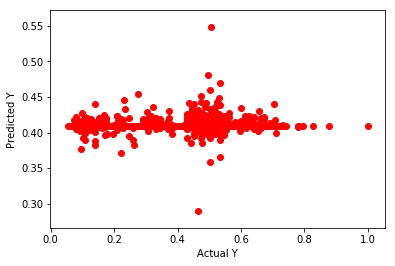

In [357]:
liregr = linear_model.LinearRegression()
liregr.fit(Xproj, Yt)
plt.scatter(Yt,liregr.predict(Xproj),color='red')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')

This looks exactly the same as our linear regression on the raw (normalized) data before projecting onto principal components. This is expected, because we're keeping all five principal components. All that is essentially happening is a rotation of the "coordinate system". Let's check the errors, they should be the same. I saved the predictions from the simple OLS in a variable ols_prediction earlier.

In [358]:
print "MSE of Linear Model on PCA-featured normalized data: ", np.mean((liregr.predict(Xproj) - Yt) ** 2)

MSE of Linear Model on PCA-featured normalized data:  0.0270504267978


In [359]:
print "MSE of Linear Model on normalized data: ", np.mean((ols_prediction - Yt) ** 2)

MSE of Linear Model on normalized data:  0.0270504267978


Now, let's keep only the first three principal components. I chose the first three via the "elbow" method, where there appears to be a slight inflection point. By incrementally increasing the number of principal components, I find that the mean square error approaches the mean square error of the regular linear model and that the percentage of explain variances approaches 100%. With three principal components, approximately 81% of the variance in the data is preserved.

In [360]:
# --------------------
# PCA on raw data, normalized
# --------------------

redata = open('manhattan-dof.csv', "r")
csvReader = csv.reader(redata,delimiter=';')
next(csvReader)

redata = open('manhattan-dof.csv', "r")
csvReader = csv.reader(redata,delimiter=',')
next(csvReader)

X = np.array([r for r in csvReader])
X = X.astype(np.float)

concat = [0,1,2,3,4]
t = []
for i in concat:
   t.append(X[:,i])
Xt=np.array(t)
Xt=Xt.reshape((-1,len(concat)))
Xtmax = np.amax(Xt,axis=0)
for i in range(0,len(concat)):
    Xt[:,i]=Xt[:,i]/Xtmax[i]

Yt=np.array(X[:,5]).reshape(-1,1)
Ytmax = np.amax(Yt)
Yt = Yt/Ytmax

for i in range(1,6):
    n=i # how many eigenvectors we choose
    pca = PCA(n)
    xB = pca.fit(Xt)
    Xproj = pca.fit_transform(Xt)

    liregr = linear_model.LinearRegression()
    liregr.fit(Xproj, Yt)
    print "Percentage of variance in data explained by the first {} eigenvectors: ".format(i),sum(xB.explained_variance_ratio_)

#     plt.scatter(Yt,liregr.predict(Xproj),color='red')
#     plt.xlabel('Actual Y')
#     plt.ylabel('Predicted Y')
    print "MSE of Linear Model - projecting on {} Principal Components: ".format(i), np.mean((liregr.predict(Xproj) - Yt) ** 2)
    print
#     eigenvalues = pca.explained_variance_ratio_
#     plt.plot(np.arange(n), eigenvalues,'o');
#     plt.xlabel("Dimensionality")
#     plt.ylabel("Explained Variance Ratio")
#     plt.show()

Percentage of variance in data explained by the first 1 eigenvectors:  0.419618440575
MSE of Linear Model - projecting on 1 Principal Components:  0.0270844125599

Percentage of variance in data explained by the first 2 eigenvectors:  0.661136813335
MSE of Linear Model - projecting on 2 Principal Components:  0.0270841667294

Percentage of variance in data explained by the first 3 eigenvectors:  0.811787404927
MSE of Linear Model - projecting on 3 Principal Components:  0.0270818541033

Percentage of variance in data explained by the first 4 eigenvectors:  0.936805957762
MSE of Linear Model - projecting on 4 Principal Components:  0.0270507979912

Percentage of variance in data explained by the first 5 eigenvectors:  1.0
MSE of Linear Model - projecting on 5 Principal Components:  0.0270504267978



So far, we have treated the variables for neighborhood and building classification as though they have a linear relationship with the market value per square foot of the building. In reality, this makes little sense. It would make more sense to remove those variables or change them to dummy variables. In using PCA to project our raw data and then only selecting the first three principle components to fit the linear model, I can reduce the effect of the "noise" that these non-linear variables introduce to the non-PCA-featured linear model. The inclusion of these two categorical variables can lead to overfitting of the data. I demonstrate this with cross-validation in the next step.

In [367]:
#Let's remove neighborhood and building classification from our original linear model:

concat = [2,3,4]
t = []
for i in concat:
   t.append(X[:,i])
X_cat_removed =np.array(t)
X_cat_removed=X_cat_removed.reshape((-1,len(concat)))
Xt_cat_max = np.amax(X_cat_removed,axis=0)
for i in range(0,len(concat)):
    X_cat_removed[:,i]=X_cat_removed[:,i]/Xt_cat_max[i]
print X_cat_removed.shape
print Yt.shape

(2645, 3)
(2645, 1)


In [368]:
X_cat_removed = sm.add_constant(X_cat_removed)
res_again =sm.OLS(Yt,X_cat_removed).fit()
print res_again.summary() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.099
Date:                Mon, 20 Feb 2017   Prob (F-statistic):              0.348
Time:                        14:10:35   Log-Likelihood:                 1021.0
No. Observations:                2645   AIC:                            -2034.
Df Residuals:                    2641   BIC:                            -2010.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.4101      0.004    116.111      0.0

(2645, 3)
(2645, 1)
[ 0.547905    0.30564283  0.14645216]


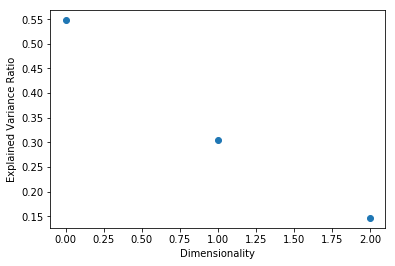

In [387]:
# --------------------
# PCA on data, after removing categorical variables
# --------------------

redata = open('manhattan-dof.csv', "r")
csvReader = csv.reader(redata,delimiter=';')
next(csvReader)

redata = open('manhattan-dof.csv', "r")
csvReader = csv.reader(redata,delimiter=',')
next(csvReader)

X = np.array([r for r in csvReader])
X = X.astype(np.float)

concat = [2,3,4]
t = []
for i in concat:
   t.append(X[:,i])
X_cat_removed =np.array(t)
X_cat_removed=X_cat_removed.reshape((-1,len(concat)))
Xt_cat_max = np.amax(X_cat_removed,axis=0)
for i in range(0,len(concat)):
    X_cat_removed[:,i]=X_cat_removed[:,i]/Xt_cat_max[i]
print X_cat_removed.shape
print Yt.shape

n=3 # how many eigenvectors we choose
pca = PCA(n)
Xproj_noncat = pca.fit_transform(X_cat_removed)
eigenvalues = pca.explained_variance_ratio_
print pca.explained_variance_ratio_
plt.plot(np.arange(n), eigenvalues,'o');
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [374]:
# --------------------
# Linear Regression after projecting normalized non-categorical data onto 3 principal components
# --------------------

print Xproj_noncat.shape
print Yt.shape
Xproj_noncat = sm.add_constant(Xproj_noncat)
res=sm.OLS(Yt,Xproj_noncat).fit()
print res.summary() 

(2645, 3)
(2645, 1)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.099
Date:                Mon, 20 Feb 2017   Prob (F-statistic):              0.348
Time:                        14:12:40   Log-Likelihood:                 1021.0
No. Observations:                2645   AIC:                            -2034.
Df Residuals:                    2641   BIC:                            -2010.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.4101      0.003

In [404]:
# Using cross validation on the non-PCA-featured linear model

R_IS=[]
R_OS=[]

n=1000
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(Xt, Yt, test_size=0.10) #10% goes to validation data, 90% goes to training
    res=linear_model.LinearRegression()
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     

#     print 1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum()
    
    X_train = sm.add_constant(X_train)
    res_again =sm.OLS(y_train,X_train).fit()
#     print res_again.rsquared
    
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("In Sample R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("Out of Sample R-squared for {} times is {}".format(n,np.mean(R_OS)))

In Sample R-squared for 1000 times is 0.00160270206617
Out of Sample R-squared for 1000 times is -0.00655440482823


In [407]:
# Using cross validation on PCA-featured linear regression
# for each loop, split the data set to train and validation set
# Use PCA only on training set to find the siginificant eigenvectors(directions)
# Then transform the test data the same way and pick the same eigenvectors for regression.

R_IS=[]
R_OS=[]

n=1000
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(Xt, Yt, test_size=0.10) #10% goes to validation data, 90% goes to training
    num_eigenvectors = 3
    pca = PCA(num_eigenvectors) # Create the model
    pca.fit(X_train) # Fit only training data

    Xproj_train = pca.transform(X_train) # Project training data onto dimensions of model fitted by X_train
    Xproj_test = pca.transform(X_test) # Project test data onto dimensions of model fitted by X_train
    
    res=linear_model.LinearRegression()
    res.fit(Xproj_train,y_train) # Linear regression on the Xproj_train
    
    R_OS.append(1-((np.asarray(res.predict(Xproj_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
    R_IS.append(1-((np.asarray(res.predict(Xproj_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     

print("In Sample R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("Out of Sample R-squared for {} times is {}".format(n,np.mean(R_OS)))

In Sample R-squared for 1000 times is 0.00043842429454
Out of Sample R-squared for 1000 times is -0.00640767087405


I believe this is giving me wrong results, but it appears that the out-of-sample R-squared terms for both the PCA-featured and non-PCA featured linear models are quite bad. The only way to get a negative R-squared term is to have a model so bad that you would have done better simply predicting the mean Y value. However, it is interesting to note that the in-sample R-squared for the non-PCA-featured linear model is slightly higher than the in-sample R-squared of the PCA-featured linear model, yet both of their out-of-sample R-squareds are equally bad. This may indicate that our PCA-featured linear model is less overfit.

(2645, 5)
(2645, 1)
(array([[-0.12254491,  0.02690248,  0.02695934,  0.13819696,  0.01101943]]), array([ 0.40926343]))
(array([[-0.02208783,  0.01298747,  0.00429333,  0.03277424,  0.00704553]]), array([ 0.40968131]))
(array([-0.00617478,  0.        ,  0.        ,  0.05455419,  0.        ]), array([ 0.40968131]))
('MSE Linear (red): %.2f', 0.027050426797810247)
('MSE Ridge (green): %.2f', 0.027073035722201187)
('MSE Lasso (black): %.2f', 0.027092958974874067)


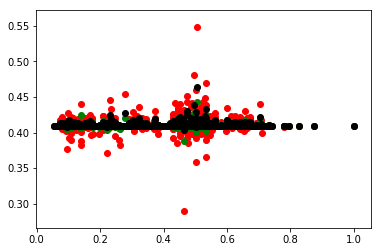

In [424]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import csv

redata = open('manhattan-dof.csv', "r")
csvReader = csv.reader(redata,delimiter=',')
next(csvReader)

X = np.array([r for r in csvReader])
X = X.astype(np.float)

# --------------------
# filtering data
# --------------------
# c = 0
# idx = np.where((X[:,0] == 4) & (X[:,3] <= 35000) & (X[:,5] > 100 ))
# idx = np.where((X[:,0] == 4) & (X[:,3] <= 35000) & (X[:,5] > 180 - 0.00054606*X[:,3]))
# idx = np.X
# --------------------
# all other variables to predict MarketValueperSqFt
# --------------------
concat = [0,1,2,3,4]
t = []
for i in concat:
   t.append(X[:,i])
Xt=np.array(t)
Xt=Xt.reshape((-1,len(concat)))
Xtmax = np.amax(Xt,axis=0)
for i in range(0,len(concat)):
    Xt[:,i]=Xt[:,i]/Xtmax[i]
print Xt.shape
Yt=np.array(X[:,5]).reshape(-1,1)
Ytmax = np.amax(Yt)
Yt = Yt/Ytmax
print Yt.shape

# --------------------
# making the linear regression
# --------------------
liregr = linear_model.LinearRegression()
riregr = linear_model.Ridge(alpha=1.0e1)
laregr = linear_model.Lasso(alpha=1.0e-4)
liregr.fit(Xt, Yt)
riregr.fit(Xt, Yt)
laregr.fit(Xt, Yt)
print(liregr.coef_,liregr.intercept_)
print(riregr.coef_,riregr.intercept_)
print(laregr.coef_,riregr.intercept_)

print("MSE Linear (red): %.2f", np.mean((liregr.predict(Xt) - Yt) ** 2))
print("MSE Ridge (green): %.2f", np.mean((riregr.predict(Xt) - Yt) ** 2))
print("MSE Lasso (black): %.2f", np.mean((laregr.predict(Xt) - Yt) ** 2))
plt.scatter(Yt,liregr.predict(Xt),color='red')
plt.scatter(Yt,riregr.predict(Xt),color='green')
plt.scatter(Yt,laregr.predict(Xt),color='black')


# --------------------
# several variables to predict MarketValueperSqFt
# --------------------
# concat = [2,3,4]
# t = []
# for i in concat:
#    t.append(X[idx,i])
# Xt=np.array(t)
# Xt=Xt.reshape((-1,len(concat)))
# Yt=np.array(X[idx,5]).reshape(-1,1)
# Xtmax = np.amax(Xt,axis=0)
# for i in range(0,len(concat)):
#    Xt[:,i]=Xt[:,i]/Xtmax[i]
# Ytmax = np.amax(Yt)
# Yt = Yt/Ytmax
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(Xt[:,0], Xt[:,1], Yt)
# ax.scatter(Xt[:,0], Xt[:,1], liregr.predict(Xt),color='red')
# ax.scatter(Xt[:,0], Xt[:,1], riregr.predict(Xt),color='green')
# ax.scatter(Xt[:,0], Xt[:,1], laregr.predict(Xt),color='black')

# --------------------
# exploring regularization values
# --------------------
# a =  np.linspace(0.01,10,50)
# eri = []
# ela = []
# pari = []
# pala = []
# for i in a:
#    riregr = linear_model.Ridge(alpha=i)
#    riregr.fit(Xt, Yt)
#    eri.append(np.mean((riregr.predict(Xt) - Yt) ** 2)) # MSE ridge
#    pari.append(riregr.coef_)
#
#    laregr = linear_model.Lasso(alpha=i)
#    laregr.fit(Xt, Yt)
#    ela.append(np.mean((laregr.predict(Xt) - Yt) ** 2)) # MSE lasso
#    pala.append(laregr.coef_)
#
# plt.figure(1)
# plt.plot(a,eri,color='red')
# plt.plot(a,ela,color='green')
#
# plt.figure(2)
# plt.plot([i[0] for i in pari], color = 'red')
# plt.plot([i[0] for i in pala], color = 'green')
#
# print("Ridge min: ", min(eri))
# print("Lasso min: ", min(ela))


# --------------------
# distribution per neighborhood / year
# --------------------
# plt.figure(2)
# dnbr = dict((x,0) for x in X[:,c])
# for x in X[:,c]:
#    dnbr[x]+=1
#
# for i in dnbr:
#    plt.scatter(i,dnbr[i],color='blue')
#
plt.show()
